In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import random
from nim import Nim21Game
from agent import A2CAgent

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import cycle

loss_hist = {1: [], 2: []}


def train_agents(episodes):
    env = Nim21Game()
    agent1 = A2CAgent()
    agent2 = A2CAgent()

    batch_size = 64

    for e in range(episodes):
        turn = random.choice([1, 2])
        start_turn = turn
        state = env.reset()
        state_hist = [state]
        action_hist = []
        reward_hist = []
        done_hist = []

        done = False
        while not done:
            current_agent = agent1 if turn == 1 else agent2
            action = current_agent.act(state)
            next_state, reward, done = env.step(action)
            action_hist.append(action)
            state_hist.append(next_state)
            reward_hist.append(reward)
            done_hist.append(done)

            state = next_state
            if done:
                break

            turn = 3 - turn  # (1 -> 2), (2 -> 1)

        state_hist.append(0)
        for turn, state, action, reward, next_state, done in zip(
            cycle([start_turn, 3 - start_turn]),
            state_hist[:-2],
            action_hist,
            reward_hist,
            state_hist[2:],
            done_hist,
        ):
            current_agent = agent1 if turn == 1 else agent2
            if next_state == 0:
                done = True

            current_agent.remember(state, action, reward, next_state, done)

        loss_hist[1].append(agent1.replay(batch_size))
        loss_hist[2].append(agent2.replay(batch_size))

        if e % 1000 == 0:
            print(f"episode={e}")

    return agent1, agent2


a1, a2 = train_agents(20000)

/Users/maurits/micromamba/envs/develop/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


episode=0
episode=1000
episode=2000
episode=3000
episode=4000
episode=5000
episode=6000
episode=7000
episode=8000
episode=9000
episode=10000
episode=11000
episode=12000
episode=13000
episode=14000
episode=15000
episode=16000
episode=17000
episode=18000
episode=19000


Text(0.5, 1.0, 'Loss values for both agents over episodes')

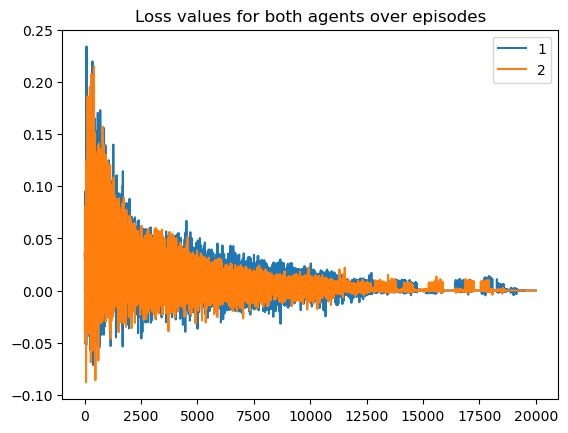

In [4]:
import numpy as np

plt.plot(np.arange(len(loss_hist[1])), loss_hist[1], label="1")
plt.plot(np.arange(len(loss_hist[2])), loss_hist[2], label="2")
plt.legend()
plt.title("Loss values for both agents over episodes")

/var/folders/3b/p0qfxjvs45l8nq2rnktrrymc0000gn/T/ipykernel_64910/2959176449.py:34: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


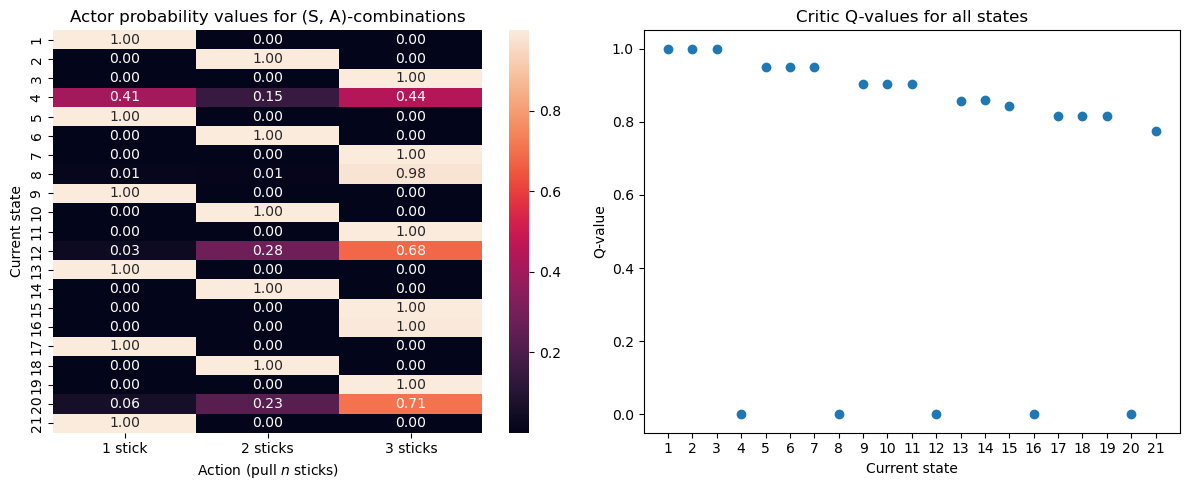

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import torch
import numpy as np

fig, axs = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(
    pd.DataFrame(
        a2.model(torch.tensor(list(range(1, 22))))[1].detach().numpy(),
        index=range(1, 22),
        columns=["1 stick", "2 sticks", "3 sticks"],
    ),
    annot=True,
    fmt=".2f",
    ax=axs[0],
)
axs[0].set_ylabel("Current state")
axs[0].set_xlabel("Action (pull $n$ sticks)")
axs[0].set_title("Actor probability values for (S, A)-combinations")


axs[1].scatter(
    np.arange(1, 22), a1.model(torch.tensor(list(range(1, 22))))[0].detach().numpy()
)
axs[1].set_xticks(np.arange(1, 22))
axs[1].set_xlabel("Current state")
axs[1].set_ylabel("Q-value")
axs[1].set_title("Critic Q-values for all states")

fig.tight_layout()
fig.savefig("./illustration.svg")

fig.show()

In [6]:
# Simulate game

turn = random.choice([1, 2])
env = Nim21Game()
state = env.reset()
done = False
while not done:
    current_agent = a1 if turn == 1 else a2
    action = current_agent.act(state)
    print(f"turn {turn}, state {state}, action {action}")
    next_state, reward, done = env.step(action)

    current_agent.remember(state, action, reward, next_state, done)

    state = next_state
    if done:
        break

    turn = 3 - turn  # (1 -> 2), (2 -> 1)

turn 2, state 21, action 1
turn 1, state 20, action 2
turn 2, state 18, action 2
turn 1, state 16, action 3
turn 2, state 13, action 1
turn 1, state 12, action 1
turn 2, state 11, action 3
turn 1, state 8, action 2
turn 2, state 6, action 2
turn 1, state 4, action 3
turn 2, state 1, action 1
